### Um breve resumo da história
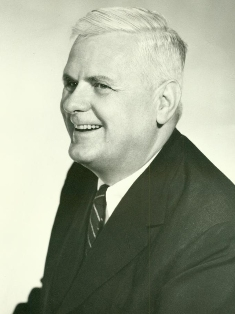

* Em 1930 Alonzo Church, orientador de Alan Turing, desenvolve o Cálculo Lambda (λ). A idéia principal era desenvolver o sistema mais simples possível capaz de estudar **funções** e aplicação de **funções**.

  Exemplo:
  * Função identidade: `λx.x`
  * Aplicação da função identidade: `(λx.x) 2` -> `2`;
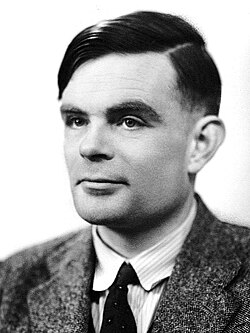    
* A

In [ ]:
(require '[clojupyter.display :as display]
         '[clojupyter.misc.helper :as helper]
         '[clojure.pprint :as pp])

(helper/add-dependencies '[com.datomic/peer "1.0.7387"])

(require '[datomic.api :as d])

In [ ]:
(def db-uri "datomic:dev://localhost:4334/mbrainz-1968-1973")

(d/create-database db-uri)
(def conn (d/connect db-uri))
(def db (d/db conn))